# Контейнеры

## 1. О контейнерах

**Контейнер** — объект, который содержит внутри себя другие объекты. Технически все контейнеры наследуют от `Collections.abc.Container` метод `__contains__`. С этим методом работает оператор `in`.

Контейнеры представлены разными структурами данных. На этих структурах можно построить всевозможные абстрактые типы данных.

**NB!** Не надо путать типы данных со структурами данных и абстрактными типами данных.

**Тип данных** — характеристика кусочка данных, которая определяет способ его интерпретации.
Например, `b1100001` может быть как число 97 (целый тип), а может быть как символ `a` из [ASCII](https://en.wikipedia.org/wiki/ASCII) (символ).

**Структура данных** — набор из примитивов данных и операций над ними, огранизованные для эффективного решения задачи.
Например, [массив](https://ru.wikipedia.org/wiki/Массив_(программирование)) или [связный список](https://ru.wikipedia.org/wiki/Связный_список).

**Абстрактный тип данных** (АТД) — математическая модель структуры данных, ее интерфейс.
Например, очередь — абстрактный тип данных, который можно реализовать на разных структурах данных.

### Проблема копирования контейнеров
В Python присваивание `=` копирует только ссылки объектов. И опреацию вида `name = obj` можно интерпретировать как присваивание объекту `obj` имени `name`. Как в таком случае скопировать объект?

Для примера, давайте попробуем скопировать список списков.

In [97]:
# Пример списка списков
a = [1,2,3]
b = [4,5,6]
c = [a,b] # содержит ссылки на a и b

Если мы список `c` присвоим списку `d`, то по факту у списка `[a,b]` просто будет  два имение `c` и `d`.

In [99]:
# Навешиваем новое имя списку с (у обеъектов даолжны быть одинаковые id)
d = c
id(c), id(d)

(4393709704, 4393709704)

Можно скопировать список, создав явно новый с содержимым старого. При этом происходит поверхностное копирование списка. Элементы указывают на элементы старого списка.

In [100]:
# Поверхностное копирование списка (списки разные, но внутренние объекты нет)
d = list(c)
id(c), id(d), id(c[0]), id(d[0])

(4393709704, 4396512968, 4396514056, 4396514056)

Различают два типа копирования:
- Поверхностное (англ. shallow)
- Глубокое (англ. deep)

В отличии от поверхностного копирования, глубокое обходит объект рекурсивно и копирует все подобъекты.

In [101]:
# Глубокое копирование списка
from copy import deepcopy
d = deepcopy(c)
id(c), id(d), id(c[0]), id(d[0])

(4393709704, 4396555464, 4396514056, 4396515144)

## 2. Built-in контейнеры

Встроенные в Python-контейнеры можно разделить на две категории:
- неизменяемые (англ. immutable) `string`, `tuple`, `range`, `frozenset`, `bytes`
- изменяемые (англ. mutable) `list`, `dict`, `set`, `bytearray`

In [103]:
# Встроенные контейнеры:
c_str = "Еду в магазин в городе Санкт-Петербурге"
c_tpl = (1, 1.2, "я")
c_rng = range(10)
c_fst = frozenset({1,2,3}) # readonly set
c_bts = bytes((3,1,4,5,1,5))
c_lst = [1,2,3]
c_dct = {1: "Sex", 2: "Drugs", 3: "Rock-and-Roll"}
c_set = {1,2,3}
c_bar = bytearray((3,1,4,5,1,5)) # writable bytes

### О сложности операций над популярными контейнерами
В таблице приведены некоторые популярные встроенные контейнеры и некоторые операции над ними с асимптотической сложностью. 

| Контейнер         | List          | []()   | Tuple         | [  ]()        | Dictionary   | []()   | Set                | []()          |
|-------------------|---------------|--------|---------------|---------------|--------------|--------|--------------------|---------------|
| Пустой контейнер  | `[]`          | $O(1)$ | `()`          | $O(1)$        | `{}`         | $O(1)$ | `Set()` или `{()}` | $O(1)$        |
| Прочитать элемент | `l[i]`        | $O(1)$ | `t[i]`        | $O(1)$        | `d[key]`     | $O(1)$ | **undefined**      | **undefined** |
| Добавить элемент  | `l.append(5)` | $O(1)$ | **undefined** | **undefined** | `d[key]=5`   | $O(1)$ | `s.add(5)`         | $O(1)$        |
| Удалить элемент   | `del l[i]`    | $O(N)$ | **undefined** | **undefined** | `del d[key]` | $O(1)$ | `s.discard(5)`     | $O(1)$        |

### О хэшируемости

Объекты в Python могут быть хэшиуруемые — таким объектам сопоставляется некоторое число (хэш), которое не меняется в течении существования объекта. Хэши используются для сравнения ключей в словарях и множествах. Технически, у хэшируемых объектов реализован метод `__hash__()`.

**NB!** Если контейнер и его элементы неизменяемые, то он хэшируемый.

In [18]:
# Хэшируемый кортеж
hash((1,3,()))

2528503368927772366

In [20]:
# Нехэшируемый кортеж (должна быть ошибка)
hash((1,3,[]))

TypeError: unhashable type: 'list'

## 3. Крутые контейнеры

Ниже приведены некоторые контейнеры из стандартной библиотеки со специальным назначением. 

### namedtuple — когда нужен «сишный struct»

In [104]:
# Пример именованного кортежа
from collections import namedtuple 
Point = namedtuple('Point', ['x', 'y'])
p = Point(1,2)

In [34]:
# К полям namedtuple можно обращаться через точку.
p.x

1

In [35]:
# Также можно читать как обычный кортеж.
p[0]

1

In [41]:
# Итерирование по именованному кортежу
for x in p:
    print(x)

1
2


In [106]:
# Именованный кортеж — неизменяемый объект (должна быть ошибка)
p.x = 4

AttributeError: can't set attribute

**NB!** `namedtuple` удобно использовать для возврата данных из функций.

### OrderedDict — когда важен порядок в словаре

`dict` не гарантирует, что будет хранить ключи в том порядке, в котором вы их задали. Если важно получить из `d.keys()` оригинальный порядок, то для этого есть `OrderedDict`.

In [107]:
# Операция реверса на словаре бесмысленна — порядка нет (должна быть ошибка)
dict_std = {"a": 1, "b": 2, "c": 3}
[k for k in reversed(dict_std)]

TypeError: 'dict' object is not reversible

In [114]:
# OrderedDict предполагает наличие порядка, можно перевернуть
from collections import OrderedDict 
dict_odr = OrderedDict({"a": 1, "b": 2, "c": 3})
[k for k in reversed(dict_odr)]

['c', 'b', 'a']

### defaultdict — когда лень инициализировать ключи 

Если обратиться к ключу словаря, которого нет, то будет ошибка.

In [116]:
# Обычный словарь ругается на поля, которых нет (должна быть ошибка)
d = {}
d["4"]

KeyError: '4'

Если надо какое-то поведение по-умолчанию, то для этого удобно использовать `defaultdict`.

In [9]:
# Пример с defaultdict, ключу по-умолчанию присвается 0.
from collections import defaultdict

s = 'я заливаю глаза керосином'
d = defaultdict(int)

for k in s:
    d[k] += 1 # без defaultdict здесь надо было  бы инициализировать ключи явно

sorted(d.items(), key=lambda x: x[1], reverse=True)

[('а', 4),
 (' ', 3),
 ('з', 2),
 ('л', 2),
 ('и', 2),
 ('о', 2),
 ('я', 1),
 ('в', 1),
 ('ю', 1),
 ('г', 1),
 ('к', 1),
 ('е', 1),
 ('р', 1),
 ('с', 1),
 ('н', 1),
 ('м', 1)]

### ChainMap — когда нужно несколько словарей представить как один

`ChainMap` хранит ссылки на другие словари. Контейнер позволяет работать с внутренними словарями как с одним целым словарем.

У `ChainMap` есть два традиционных приложения:
- Возвращать значения по-умполчанию из словаря, если ключа нет.
- Поиск по нескольких словарям.

In [3]:
# Пример с ChainMap: поиск по двум словарям
from collections import ChainMap

group1 = {"a": 1, "b": 2}
group2 = {"c": 3, "d": 4}
groups = ChainMap(group1, group2)
groups["d"], groups["b"]

(4, 2)

Здесь `group1` может быть словарём параметров, а `group2` — словарём значений параметров по-умолчанию. Если значения нет в `group1`, то вернётся значение из `group2`.



### MappingProxyType — когда нужен словарь только для чтения

In [26]:
# Пример словаря, в который нельзя писать
from types import MappingProxyType

d = {"a": 1, "b": 2} # Обычный словарь
d_ro = MappingProxyType(d) # MappingProxyType (Read Only)

d_ro["a"]

1

In [4]:
# Записать в MappingProxyType нельзя (должна быть ошибка)
d_ro["a"] = 1

NameError: name 'd_ro' is not defined

### Counter — когда надо мультимножество

**Мультимножество** — множество, элементы в котором могут повторяться.

In [16]:
# Пример построения мультимножества по итерируемому объекту (строке)
from collections import Counter

s = 'я заливаю глаза керосином'
c = Counter(s)
c

Counter({'я': 1,
         ' ': 3,
         'з': 2,
         'а': 4,
         'л': 2,
         'и': 2,
         'в': 1,
         'ю': 1,
         'г': 1,
         'к': 1,
         'е': 1,
         'р': 1,
         'о': 2,
         'с': 1,
         'н': 1,
         'м': 1})

In [15]:
# sum — количество элементов в множестве, 
# len - количество уникальных элементов в множестве
sum(c.values()), len(c.values())

(25, 16)

### deque — когда нужен двусторонний доступ

И очередь и стек можно реализовать на `list`. Но `list` реализован на динамическом массиве, а `deque` на связном списке.

In [72]:
# Пример двусторонней очереди
from collections import deque
d = deque()
d.append("я")
d.append("иду")
d.append("брать")
d.append("лут")
d.popleft(), d.pop()

('я', 'лут')

### heapq — когда нужна очередь с приоритетом

In [24]:
# Пример
from heapq import heappush, heappop

q = []
heappush(q, (3, "Продакшен"))
heappush(q, (1, "Чпок"))
heappush(q, (2, "Чпок"))

heappop(q),heappop(q),heappop(q)

((1, 'Чпок'), (2, 'Чпок'), (3, 'Продакшен'))

### dataclasses — когда от класса надо только хранение данных

Когда нужен изменяемый `namedtuple`, то подходит `dataclasses`.

In [17]:
# Пример с собственным dataclass
from dataclasses import dataclass

@dataclass
class Structure:
    name: str
    value: float

    @property
    def square(self) -> float:
        return self.value * self.value
    
s = Structure("я", 2)
s.square

4

По-умолчанию `dataclass` генерирует 3 дандер-метода (метод с двойным подчеркиванием):
- `init`,
- `repr`,
- `eq`.

Через опции декоратора можно сделать `dataclass` immutable (`frozen`), mutable-хэшируемым (`unsafe_hash`) и сравниваемым (`order`).

![title](img/namedtuple-vs-dataclass.png)

## 4. Numpy: компактные массивы + готовые алгоритмы

**Numpy** — библиотека для научных вычислений, которая предоставляет эффективные массивы. Массивы в numpy называтют `ndarray` (от N-dimensional array).

`ndarray` состоят из трёх частей:
- плотно упакованной последовательности данных одного типа, которую называют *data buffer*,
- метаданных, которые описывают тип данных массива,
- и метаданных, которые описывают форму массива.

![title](img/numpy.png)

### Простейшие операции
Ниже показаны простейшие операции с numpy-массивом: 
- создание массива,
- вставка в конец, 
- извлечение по интексу,
- взятие подмассива, 
- чтение атрибутов.

In [64]:
# Импортируем numpy
import numpy as np

In [65]:
# Пример 1D-массива
x = np.array([1, 2, 3], np.int32) # Создаем массив

x = np.append(x, np.int32(4)) # Добавить в конец массива

(type(x),
 x.shape, # форма массива
 x.dtype, # тип элемента
 x[2],    # извлечь элемент по индексу
 x[:2]    # slice (подмассив)
)

(numpy.ndarray, (4,), dtype('int32'), 3, array([1, 2], dtype=int32))

Массивы в numpy производительней списков.

In [66]:
# Списки vs Numpy: список
%timeit a = [i**2 for i in range(1000)]

357 µs ± 25.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [67]:
# Списки vs Numpy: numpy-массив
%timeit b = np.arange(1000)**2

2.71 µs ± 45 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Хранилище данных `ndarray` — непрерывная последовательность байт. К ней можно получить прямой доступ.

In [68]:
# Хранилище данных в массиве numpy
type(x.data), x.data

(memoryview, <memory at 0x117faf048>)

**NB!** `memoryview` — специальный встроенный тип в Python, который даёт эффеткинвый доступ к памяти объектов. Если необыходимо выделить участок подпамяти, то это происходит без копирования.

In [140]:
# Атрибуты массива в numpy
x.__array_interface__, x.flags

({'data': (140536922895200, False),
  'strides': None,
  'descr': [('', '<i4')],
  'typestr': '<i4',
  'shape': (4,),
  'version': 3},
   C_CONTIGUOUS : True
   F_CONTIGUOUS : True
   OWNDATA : True
   WRITEABLE : True
   ALIGNED : True
   WRITEBACKIFCOPY : False
   UPDATEIFCOPY : False)

Для каких-то экзотических случаев может быть полезно использовать внешний data buffer.

In [27]:
# Numpy-массив на внешнем data buffer
s = b"Hello"
y=np.frombuffer(s, dtype=np.int8)
y, id(s), y.__array_interface__["data"][0]

(array([ 72, 101, 108, 108, 111], dtype=int8), 4454030432, 4454030464)

Обратите внимание на адрес байтовой строки (`id` в CPython) и адрес data buffer.

### Индексирование

**Страйд** (англ. stride) — шаг, с которым извлекаются элементы массива.

In [158]:
# Схема индексирования
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]
             ],
             np.int32)
x.strides # вернёт (3*4, 4), где 4 — длина одного элемента в байтах

(12, 4)

Некоторые модификации массивов numpy сводятся к изменению страйдов.

In [162]:
# Реврс массива numpy — изменние страйда
x = np.array([1,2,3], np.int8)
x.strides, x[::-1].strides

((1,), (-1,))

In [167]:
# Изменение формы массива numpy — изменние страйда
x = np.array([[1,2,3],
              [4,5,6],
             ],
             np.int8)
x.strides, x.reshape(6,1), x.reshape(6,1).strides

((3, 1), array([[1],
        [2],
        [3],
        [4],
        [5],
        [6]], dtype=int8), (1, 1))

In [183]:
# Индексация по маске
x = np.array([1,2,3], np.int8)
x[[False, True, False]]

array([2], dtype=int8)

In [185]:
# Индексация по по маске, заданной функцией
x = np.arange(1, 10)
x[x%2==0]

array([2, 4, 6, 8])

In [182]:
# Индексация по списку индексов
x = np.array([1,2,3], np.int8)
x[[1,2]]

array([2, 3], dtype=int8)

### Некоторые функции над массивами numpy

In [195]:
# Полэлементное произведение матриц и матричное произведение (dot)
a = np.array([[1,2],[3,4]])
b = np.array([[1,0],[0,1]])

print(a*b , a.dot(b), sep='\n\n')

[[1 0]
 [0 4]]

[[1 2]
 [3 4]]


In [205]:
# Сумма, среднее, максимальное значение, индекс максимального значения массива
x = np.random.rand(10)
(
    x,
    x.sum(),
    x.mean(),
    x.max(),
    x.argmax()
)

(array([0.72326561, 0.21875576, 0.47994671, 0.25962497, 0.97692425,
        0.30284798, 0.66489768, 0.27099914, 0.80422639, 0.66814775]),
 5.36963624746371,
 0.5369636247463709,
 0.9769242503111887,
 4)

In [73]:
# Broadcasting — если размеры массивов не совпадают, то операции размножаются
a = np.array([[1,2],[3,4]])
b = np.array([[0,1]])
a+b

array([[1, 3],
       [3, 5]])

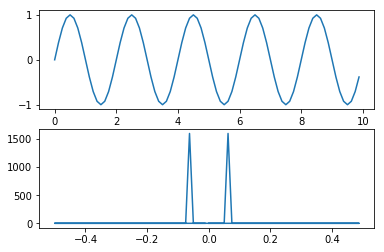

In [71]:
# Пример FFT с numpy-массивом 
import matplotlib.pyplot as plt

t = np.arange(0,10,0.125)
s = np.sin(2*0.5*np.pi*t)
sp = np.fft.fft(s)
freq = np.fft.fftfreq(t.shape[-1])
plt.subplot(2, 1, 1)
plt.plot(t, s)
plt.subplot(2, 1, 2)
plt.plot(freq, sp * np.conjugate(sp))

### Почитать

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/index.html)

## 5. Pands: таблицы

Основные структуры данных в Pandas — `Series` и `DataFrame`.

In [54]:
# Series в Pandas
import pandas as pd

pd.Series([1, 3, 5, np.nan, 6, 8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [56]:
# DataFrame в Pandas
import pandas as pd

pd.DataFrame({'one': pd.Series([1., 2., 3.]),
              'two': pd.Series([1., 2., 3., 4.])})

,one,two
0,1.0,1.0
1,2.0,2.0
2,3.0,3.0
3,NaN,4.0


### Почитать

[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)